In [1]:
adult <- dget('adult.txt')
library(ggplot2)

## EXPLORE DATA

In [2]:
# Explore the dataset with summary and str
summary(adult)
str(adult)

      RBMI           BMI_P          RACEHPR2         SRSEX      
 Min.   :1.000   Min.   :12.65   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:22.77   1st Qu.:5.000   1st Qu.:1.000  
 Median :3.000   Median :25.72   Median :6.000   Median :2.000  
 Mean   :2.748   Mean   :26.64   Mean   :5.088   Mean   :1.591  
 3rd Qu.:3.000   3rd Qu.:29.32   3rd Qu.:6.000   3rd Qu.:2.000  
 Max.   :4.000   Max.   :93.72   Max.   :6.000   Max.   :2.000  
    SRAGE_P          MARIT2           AB1            ASTCUR     
 Min.   :18.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:44.00   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :57.00   Median :1.000   Median :2.000   Median :2.000  
 Mean   :56.14   Mean   :2.043   Mean   :2.525   Mean   :1.915  
 3rd Qu.:69.00   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:2.000  
 Max.   :85.00   Max.   :4.000   Max.   :5.000   Max.   :2.000  
      AB51             POVLL      
 Min.   :-1.0000   Min.   :1.000  
 1st Qu.:-1.0000   1

'data.frame':	44346 obs. of  10 variables:
 $ RBMI    : num  3 3 3 2 3 4 3 2 3 3 ...
 $ BMI_P   : num  28.9 26.1 25.1 25 25.1 ...
 $ RACEHPR2: num  6 6 6 6 6 6 6 6 6 6 ...
 $ SRSEX   : num  1 2 1 1 1 2 1 2 1 2 ...
 $ SRAGE_P : num  32 80 71 39 75 53 42 33 67 52 ...
 $ MARIT2  : num  1 3 1 4 1 1 1 1 3 3 ...
 $ AB1     : num  1 1 2 1 2 3 2 2 1 5 ...
 $ ASTCUR  : num  2 2 1 2 2 1 2 2 2 2 ...
 $ AB51    : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ POVLL   : num  4 4 4 4 4 4 4 3 4 4 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


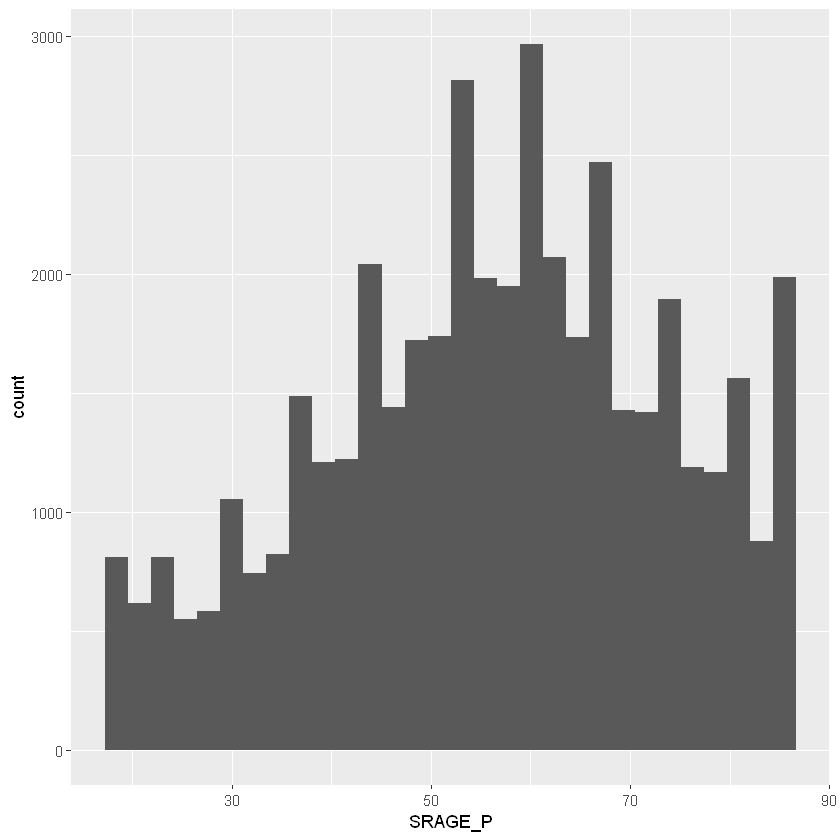

In [3]:
# Age histogram
ggplot(adult, aes(x = SRAGE_P)) +
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


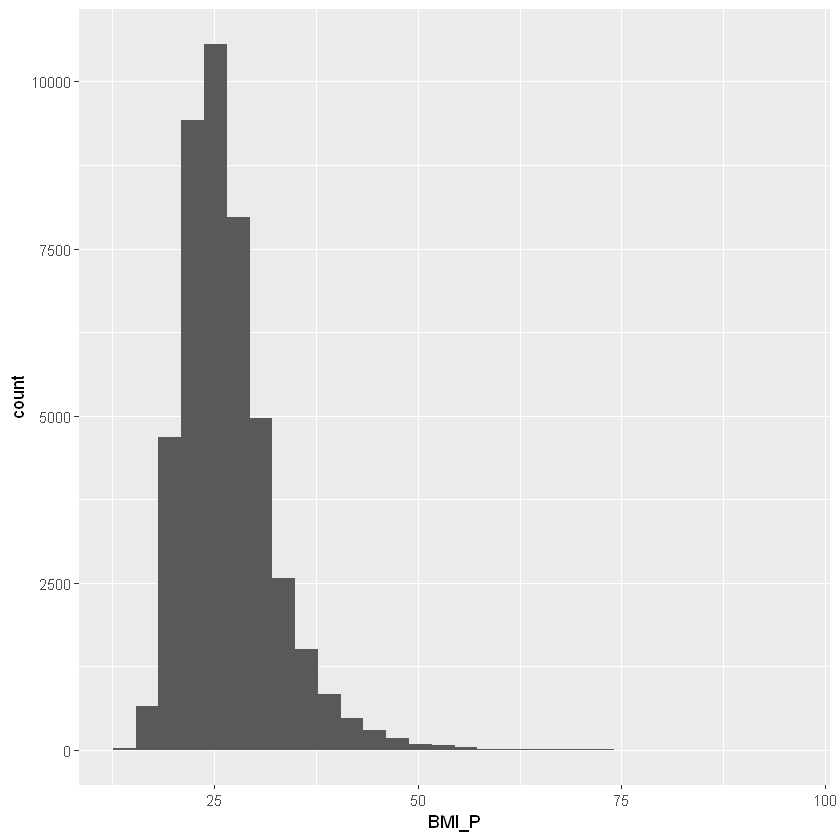

In [4]:
# BMI histogram
ggplot(adult, aes(x = BMI_P)) +
  geom_histogram()

In [5]:
# Default binwidth
diff(range(adult$SRAGE_P))/30

[1] 2.233333

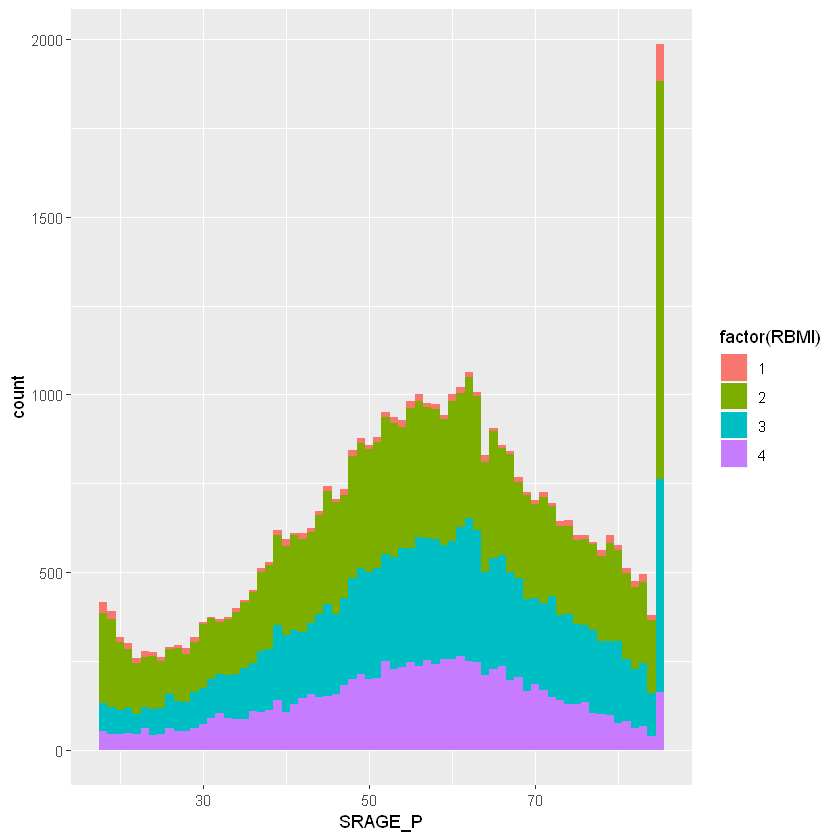

In [6]:
# Age colored by BMI, default binwidth
ggplot(adult, aes(x = SRAGE_P, fill = factor(RBMI))) +
  geom_histogram(binwidth = 1)

=> There is an unexpectedly large number of very old people.

## DATA CLEANING

In [7]:
head(adult)

RBMI,BMI_P,RACEHPR2,SRSEX,SRAGE_P,MARIT2,AB1,ASTCUR,AB51,POVLL
3,28.89,6,1,32,1,1,2,-1,4
3,26.15,6,2,80,3,1,2,-1,4
3,25.06,6,1,71,1,2,1,-1,4
2,24.99,6,1,39,4,1,2,-1,4
3,25.09,6,1,75,1,2,2,-1,4
4,32.21,6,2,53,1,3,1,-1,4


In [8]:
# Remove individual aboves 84
adult <- adult[adult$SRAGE_P <= 84, ]

In [9]:
# Remove individuals with a BMI below 16 and above or equal to 52
adult <- adult[adult$BMI_P >= 16 & adult$BMI_P < 52, ]

In [10]:
# Relabel the race variable:
adult$RACEHPR2 <- factor(adult$RACEHPR2, labels = c("Latino", "Asian", "African American", "White"))

In [11]:
# Relabel the BMI categories variable:
adult$RBMI <- factor(adult$RBMI, labels = c("Under-weight", "Normal-weight", "Over-weight", "Obese"))

In [12]:
head(adult)

RBMI,BMI_P,RACEHPR2,SRSEX,SRAGE_P,MARIT2,AB1,ASTCUR,AB51,POVLL
Over-weight,28.89,White,1,32,1,1,2,-1,4
Over-weight,26.15,White,2,80,3,1,2,-1,4
Over-weight,25.06,White,1,71,1,2,1,-1,4
Normal-weight,24.99,White,1,39,4,1,2,-1,4
Over-weight,25.09,White,1,75,1,2,2,-1,4
Obese,32.21,White,2,53,1,3,1,-1,4


## DENSITY HISTOGRAM BY POSITION

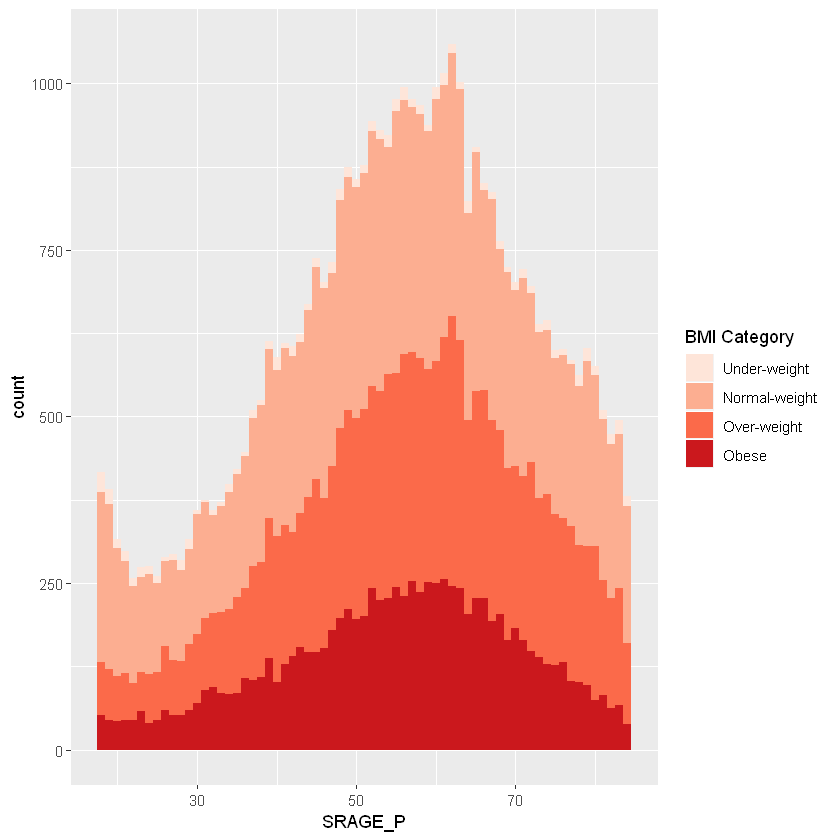

In [15]:
# Plot 1 - Count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill

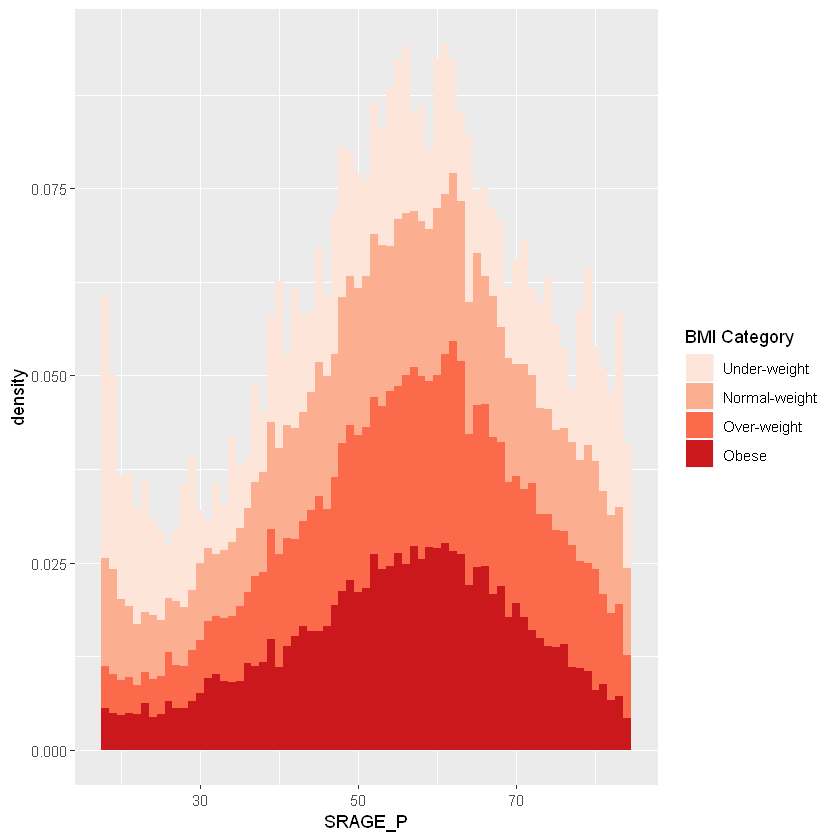

In [16]:
# Plot 2 - Density histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1) +
  BMI_fill

In [13]:
# The color scale used in the plot
BMI_fill <- scale_fill_brewer("BMI Category", palette = "Reds")

# Theme to fix category display in faceted plot
fix_strips <- theme(strip.text.y = element_text(angle = 0, hjust = 0, vjust = 0.1, size = 14),
                    strip.background = element_blank(),
                    legend.position = "none")

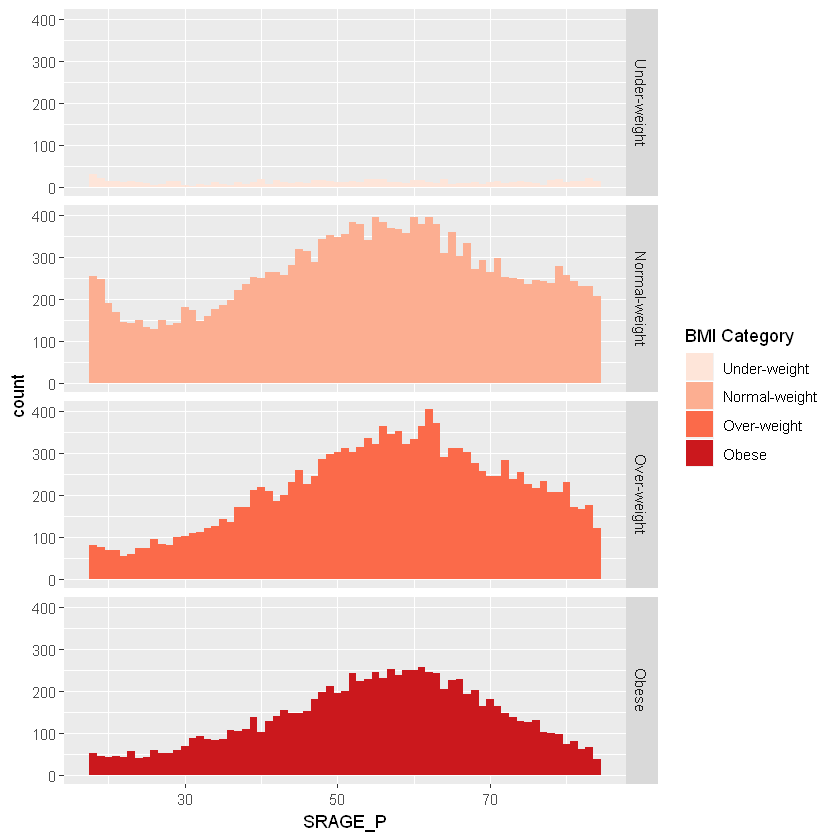

In [17]:
# Plot 3 - Faceted count histogram
ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(binwidth = 1) +
  BMI_fill +
  facet_grid(RBMI ~ .)

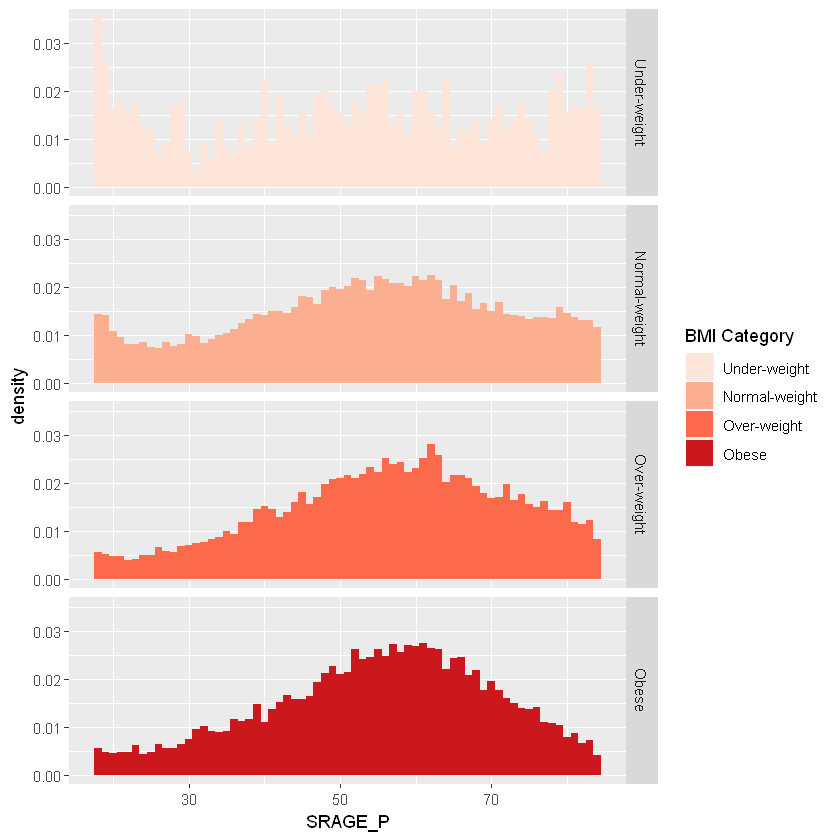

In [18]:
# Plot 4 - Faceted density histogram
ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1) +
  BMI_fill +
  facet_grid(RBMI ~ .)

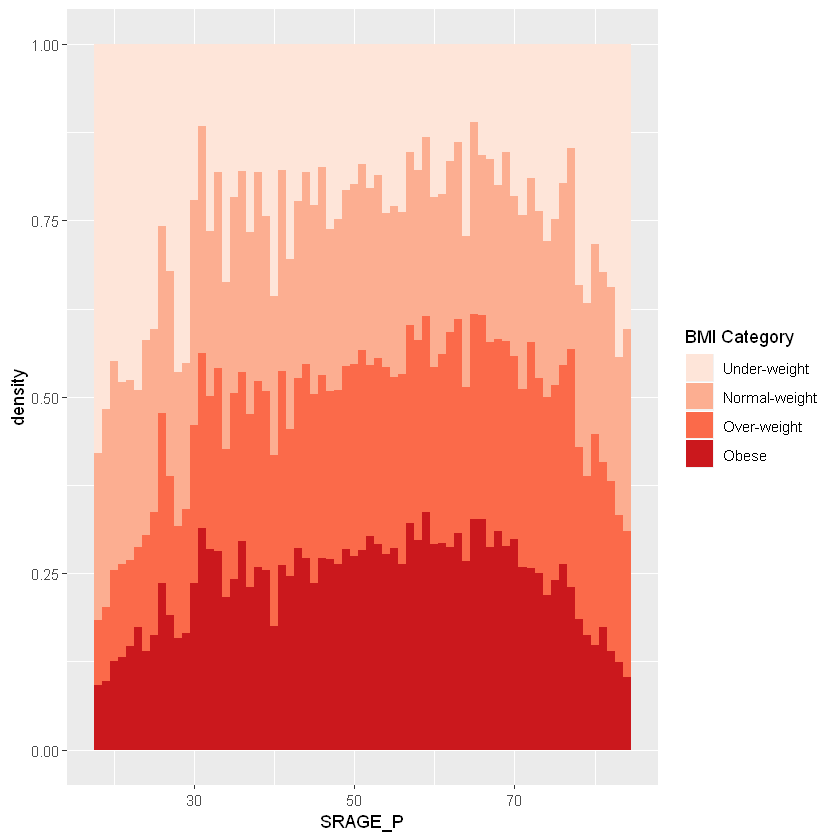

In [21]:
# Plot 5 - Density histogram with position = "fill"
a <- ggplot(adult, aes(x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..density..), binwidth = 1, position = "fill") +
  BMI_fill
a

In [22]:
a_obs <- data.frame(ggplot_build(a)$data)
library(dplyr)
a_obs %>% filter(x == 18) %>%
  select(density, y) %>%
  mutate(calculate_perc = density/sum(density)) %>%
  mutate(calculate_y = cumsum(calculate_perc))

density,y,calculate_perc,calculate_y
0.005599828,0.09196657,0.09196657,0.09196657
0.005561735,0.18330754,0.09134097,0.18330754
0.014392566,0.41967819,0.23637065,0.41967819
0.035335689,1.00000000,0.58032181,1.00000000


=> **This is not an accurate representation, as density calculates the proportion across category, and not across bin.**

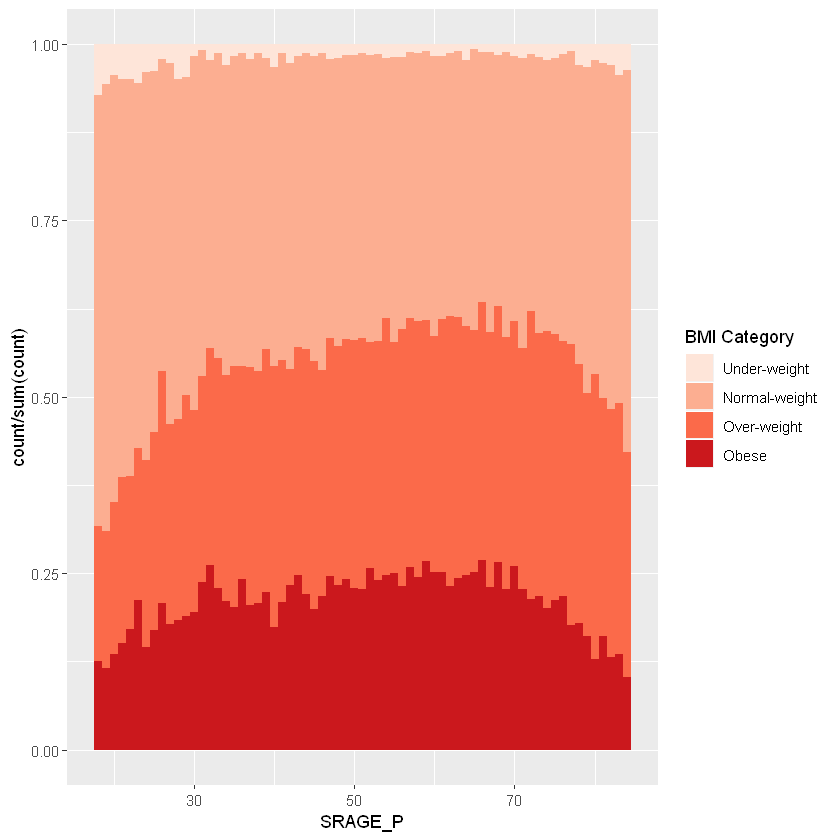

In [23]:
# Plot 6 - The accurate histogram
b <- ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 1, position = "fill") +
  BMI_fill
b

In [24]:
b_obs <- data.frame(ggplot_build(b)$data)
b_obs %>% filter(x == 18) %>%
  select(count, y) %>%
  mutate(calculate_perc = count/sum(count)) %>%
  mutate(calculate_y = cumsum(calculate_perc))

count,y,calculate_perc,calculate_y
52,0.1250000,0.12500000,0.1250000
80,0.3173077,0.19230769,0.3173077
254,0.9278846,0.61057692,0.9278846
30,1.0000000,0.07211538,1.0000000


## DENSITY HISTOGRAM BY FACET

fill,y,count,x,xmin,xmax,density,ncount,ndensity,PANEL,group,ymin,ymax,colour,size,linetype,alpha
#FEE5D9,1,30,18,17.5,18.5,0.03533569,1.0000000,1.0000000,1,1,0,1,NA,0.5,1,NA
#FEE5D9,1,22,19,18.5,19.5,0.02591284,0.7333333,0.7333333,1,1,0,1,NA,0.5,1,NA
#FEE5D9,1,14,20,19.5,20.5,0.01648999,0.4666667,0.4666667,1,1,0,1,NA,0.5,1,NA
#FEE5D9,1,15,21,20.5,21.5,0.01766784,0.5000000,0.5000000,1,1,0,1,NA,0.5,1,NA
#FEE5D9,1,13,22,21.5,22.5,0.01531213,0.4333333,0.4333333,1,1,0,1,NA,0.5,1,NA
#FEE5D9,1,15,23,22.5,23.5,0.01766784,0.5000000,0.5000000,1,1,0,1,NA,0.5,1,NA


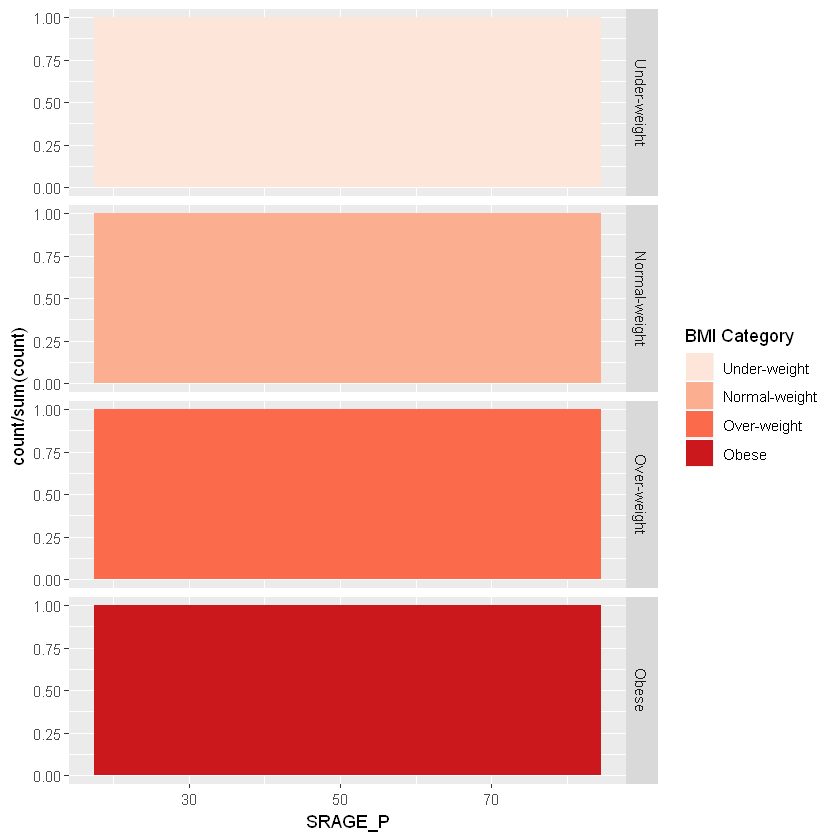

In [29]:
# An attempt to facet the accurate frequency histogram from before (failed)
# the calculation occurs on the fly inside ggplot2
c <- ggplot(adult, aes (x = SRAGE_P, fill= factor(RBMI))) +
  geom_histogram(aes(y = ..count../sum(..count..)), binwidth = 1, position = "fill") +
  BMI_fill +
  facet_grid(RBMI ~ .)
c
c_obs <- data.frame(ggplot_build(c)$data)
head(c_obs)

In [37]:
# Create DF with table()
DF <- table(adult$RBMI, adult$SRAGE_P)

head(DF, n = 2)

               
                 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  Under-weight   30  22  14  15  13  15  11  10   6   8  14  15   6   3   8   5
  Normal-weight 254 248 191 168 145 142 151 133 128 150 137 142 180 173 147 160
               
                 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  Under-weight   12   7   6  11   7  12  19   8  16  11   9  13   9  16  17  14
  Normal-weight 175 185 198 222 236 253 250 265 263 257 280 318 315 289 343 351
               
                 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  Under-weight   13  11  15  13  18  18  19  11  13   9  17  17  13  10  19   7
  Normal-weight 347 355 384 379 341 394 382 368 366 357 394 379 396 378 310 359
               
                 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  Under-weight   10  10  12   8  12  14  10  12  15  12   9   6  17  20  13  14
  Normal-weight 301 332 271 293 263 297 253 250 247 235 

In [39]:
# Use apply on DF to get frequency of each group: DF_freq
DF_freq <- apply(DF, 2, function(x) x/sum(x))
                 
head(DF_freq, n = 2)

,18,19,20,21,22,23,24,25,26,27,...,75,76,77,78,79,80,81,82,83,84
Under-weight,0.07211538,0.05626598,0.0443038,0.05033557,0.0503876,0.05474453,0.0400000,0.03846154,0.02076125,0.02730375,...,0.0200000,0.01497504,0.01025641,0.03024911,0.0331675,0.0226087,0.02745098,0.02959831,0.04444444,0.03684211
Normal-weight,0.61057692,0.63427110,0.6044304,0.56375839,0.5620155,0.51824818,0.5490909,0.51153846,0.44290657,0.51194539,...,0.3916667,0.40599002,0.41538462,0.42348754,0.4610282,0.4452174,0.47450980,0.48837209,0.46464646,0.54210526


In [33]:
# Load reshape2 and use melt() on DF_freq to create DF_melted
library(reshape2)
DF_melted <- melt(DF_freq)

# Change names of DF_melted
names(DF_melted) <- c("FILL", "X", "value")

In [34]:
head(DF_melted)

FILL,X,value
Under-weight,18,0.07211538
Normal-weight,18,0.61057692
Over-weight,18,0.19230769
Obese,18,0.12500000
Under-weight,19,0.05626598
Normal-weight,19,0.63427110


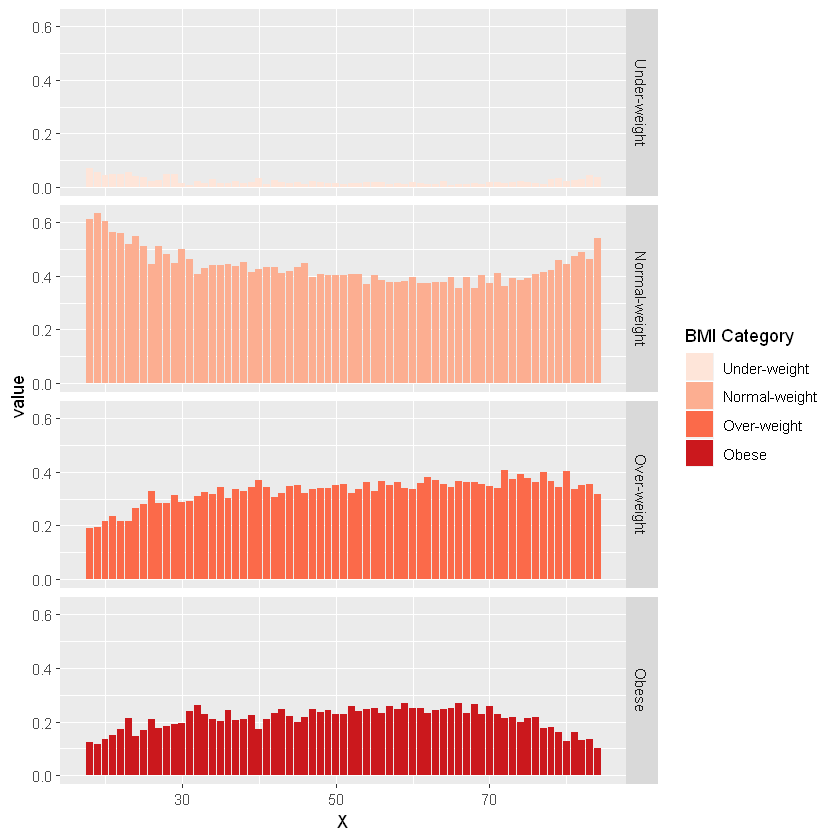

In [35]:
# Add code to make this a faceted plot
ggplot(DF_melted, aes(x = X, y = value, fill = FILL)) +
  geom_col(position = "stack") +
  BMI_fill + 
  facet_grid(FILL ~ .)